## Projeto final - Introdução à Modelagem e Aprendizado - UTFPR

### Alunos: Mariana Bittencourt e Thiago Lemos

### Para o projeto final, iremos realizar a classificação de dados de acelerômetro da placa Arduino, que foi fixada no pulso, como mostra a imagem:

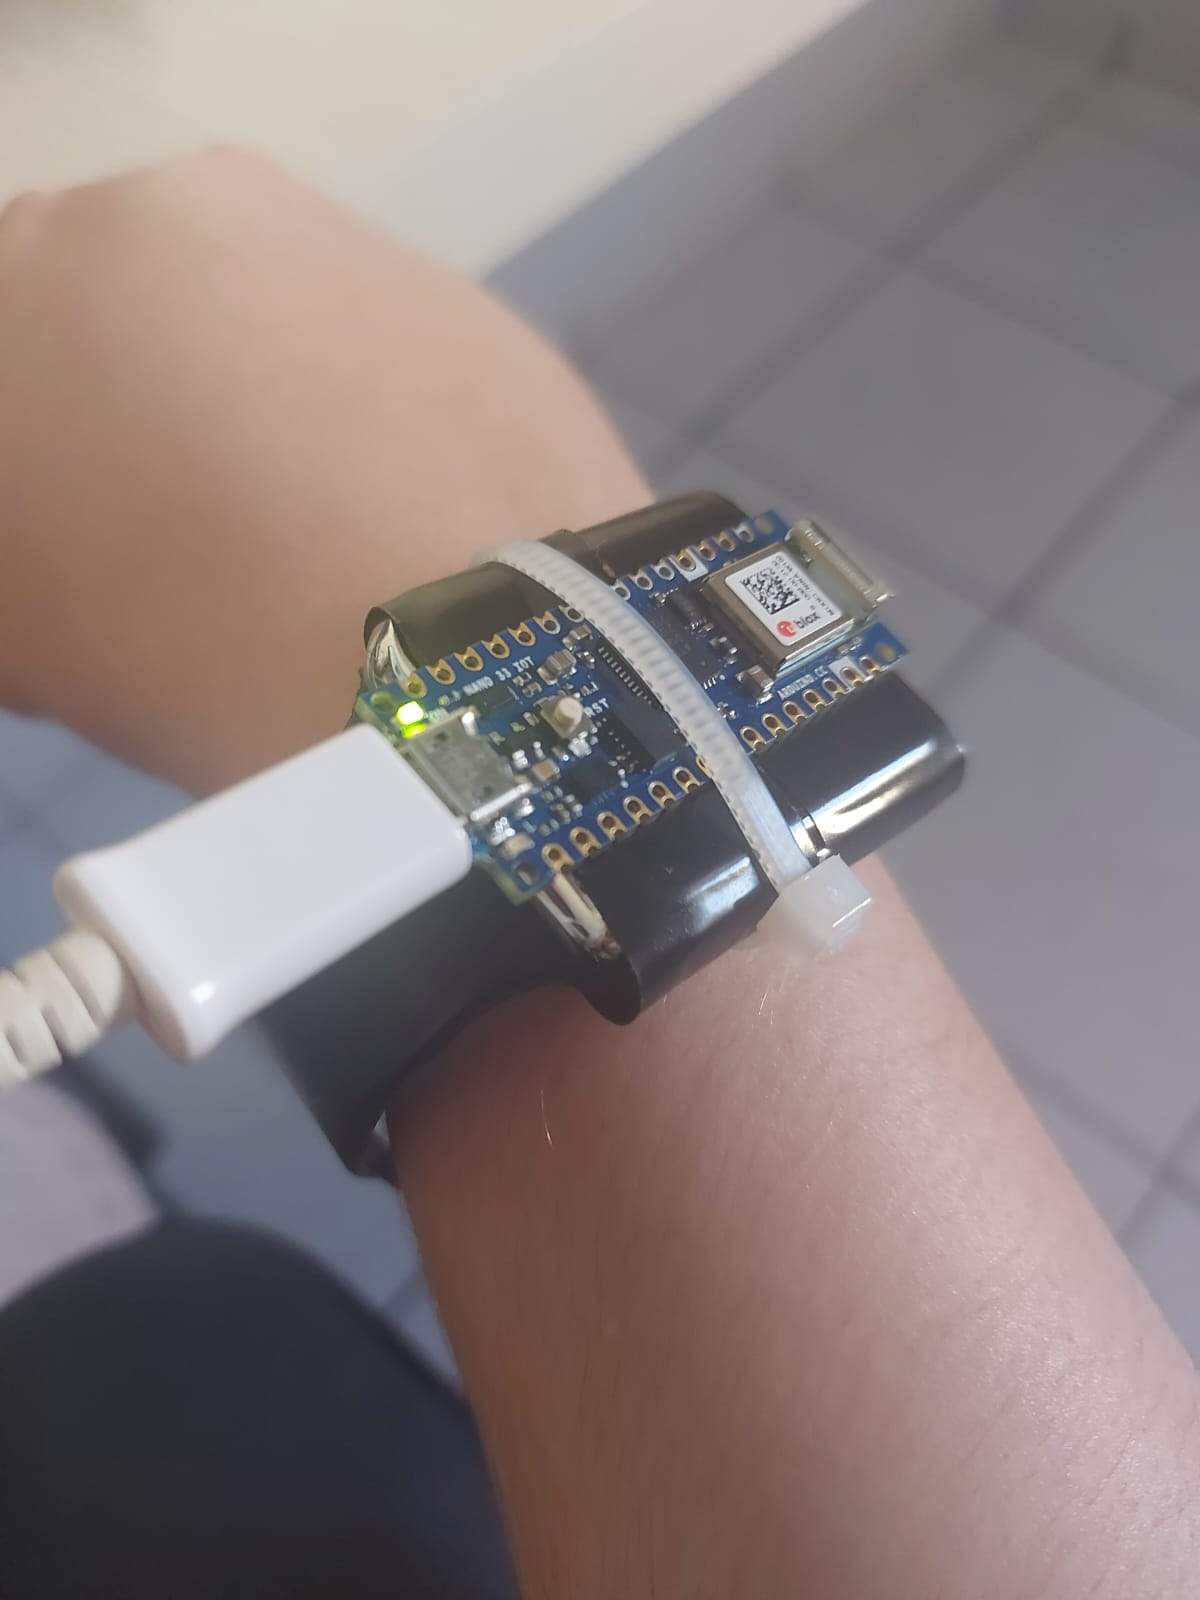

In [1]:
from IPython.display import Image
Image("placa_arduino_pulso.jpeg",width = 300, height = 150)

### Realizaremos a classificação entre quatro atividades: Beber água, acenar, digitar em um computador e ficar parado

### 1) Primeiro passo: Importar as bibliotecas necessárias inicialmente

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import json

In [6]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 1000)

### 2) Utilizando o mesmo método do Assignment 3, vamos criar as features a partir dos dados do acelerômetro

In [3]:
base_path = r"C:\Users\menin\Local Documents\ML\Modelagem_UTFPR\Projeto\classificador-atividades-export"

df_filenames = pd.DataFrame(columns=['name','class','train or test'])
classes = ['Parado','Acenar','Beber','Digitar']
options = ['training','testing']
df_train = pd.DataFrame(columns=['Ax_avg','Ay_avg','Az_avg','Ax_std','Ay_std','Az_std','Ax_max','Ay_max',
                                'Az_max','Ax_rms','Ay_rms','Az_rms','Class'])
df_test = pd.DataFrame(columns=['Ax_avg','Ay_avg','Az_avg','Ax_std','Ay_std','Az_std','Ax_max','Ay_max',
                                'Az_max','Ax_rms','Ay_rms','Az_rms','Class'])

for o in options:   #training or testing
    li_df = []
    
    for c in classes:      
        Ax_avg = []
        Ay_avg = []
        Az_avg = []
        Ax_std = []
        Ay_std = []
        Az_std = []
        Ax_max = []
        Ay_max = []
        Az_max = []
        Ax_rms = []
        Ay_rms = []
        Az_rms = []
        df_class = pd.DataFrame(columns=['Ax_avg','Ay_avg','Az_avg','Ax_std','Ay_std','Az_std','Ax_max','Ay_max',
                                'Az_max','Ax_rms','Ay_rms','Az_rms',"Class"])
        
        path_full = os.path.join(base_path + '\{}'.format(o) + '\{}'.format(c))
        
        for filename in os.listdir(path_full):
            with open('{}\{}'.format(path_full,filename), 'rb') as fp:
                x = json.load(fp)
                x = x['payload']['values']
                x = np.array(x)
                #features extraction: average, standard deviation, maximum value and rms value
                avg_ax = np.mean(x[:,0])
                avg_ay = np.mean(x[:,1])
                avg_az = np.mean(x[:,2])
                std_ax = np.std(x[:,0])
                std_ay = np.std(x[:,1])
                std_az = np.std(x[:,2])
                max_ax = np.max(x[:,0])
                max_ay = np.max(x[:,1])
                max_az = np.max(x[:,2])
                rms_ax = np.sqrt(np.mean((x[:,0])**2))
                rms_ay = np.sqrt(np.mean((x[:,1])**2))
                rms_az = np.sqrt(np.mean((x[:,2])**2))
                
                Ax_avg.append(avg_ax)
                Ay_avg.append(avg_ay)
                Az_avg.append(avg_az)
                
                Ax_std.append(std_ax)
                Ay_std.append(std_ay)
                Az_std.append(std_az)
                         
                Ax_max.append(max_ax)
                Ay_max.append(max_ay)
                Az_max.append(max_az)
                
                Ax_rms.append(rms_ax)
                Ay_rms.append(rms_ay)
                Az_rms.append(rms_az)
                
        df_class['Ax_avg'] = pd.Series(Ax_avg)
        df_class['Ay_avg'] = pd.Series(Ay_avg)
        df_class['Az_avg'] = pd.Series(Az_avg)
        
        df_class['Ax_std'] = pd.Series(Ax_std)
        df_class['Ay_std'] = pd.Series(Ay_std)
        df_class['Az_std'] = pd.Series(Az_std)
        
        df_class['Ax_max'] = pd.Series(Ax_max)
        df_class['Ay_max'] = pd.Series(Ay_max)
        df_class['Az_max'] = pd.Series(Az_max)
        
        df_class['Ax_rms'] = pd.Series(Ax_rms)
        df_class['Ay_rms'] = pd.Series(Ay_rms)
        df_class['Az_rms'] = pd.Series(Az_rms)
        
        df_class['Class'] = c
        
        li_df.append(df_class)
        
    if o == 'training':
        df_train = pd.concat(li_df)
    else:
        df_test = pd.concat(li_df)

In [7]:
df_train.head(100)

,Ax_avg,Ay_avg,Az_avg,Ax_std,Ay_std,Az_std,Ax_max,Ay_max,Az_max,Ax_rms,Ay_rms,Az_rms,Class
0,-3.531306,2.043020,8.953490,0.035398,0.019925,0.013548,-3.37,2.11,9.04,3.531484,2.043118,8.953500,Parado
1,-4.657551,-4.219755,7.448612,0.087615,0.081493,0.065229,-4.25,-3.87,7.75,4.658375,4.220542,7.448898,Parado
2,-4.819816,-4.299490,7.302347,0.035694,0.050705,0.033649,-4.67,-4.03,7.44,4.819948,4.299789,7.302424,Parado
3,-3.169531,2.512184,8.968776,0.026108,0.034834,0.012670,-3.07,2.59,9.01,3.169638,2.512425,8.968784,Parado
4,-3.040184,2.444959,9.036469,0.022098,0.033174,0.012205,-2.97,2.52,9.07,3.040264,2.445184,9.036478,Parado
5,-5.227673,-2.327959,7.889143,0.037026,0.040121,0.032389,-5.10,-2.21,7.98,5.227805,2.328305,7.889209,Parado
6,-3.484122,2.213816,8.930061,0.059365,0.056141,0.031027,-3.34,2.52,8.99,3.484628,2.214528,8.930115,Parado
7,-3.530388,2.204388,8.915184,0.019879,0.025009,0.010864,-3.44,2.26,8.94,3.530444,2.204530,8.915190,Parado
8,-3.559776,2.230776,8.891041,0.060829,0.041608,0.025737,-3.39,2.38,9.18,3.560295,2.231164,8.891078,Parado
9,-4.797082,-2.477388,8.142714,0.033852,0.023649,0.026151,-4.71,-2.42,8.24,4.797201,2.477501,8.142756,Parado


In [8]:
df_test.head(50)

,Ax_avg,Ay_avg,Az_avg,Ax_std,Ay_std,Az_std,Ax_max,Ay_max,Az_max,Ax_rms,Ay_rms,Az_rms,Class
0,-2.888592,1.468306,9.300592,0.029580,0.020208,0.012708,-2.81,1.53,9.34,2.888743,1.468445,9.300601,Parado
1,-2.643837,1.512082,9.378592,0.054518,0.021202,0.019332,-2.46,1.57,9.43,2.644399,1.512230,9.378612,Parado
2,-3.585612,1.812837,8.980531,0.024280,0.022811,0.011053,-3.50,2.14,9.00,3.585694,1.812980,8.980537,Parado
3,-3.690347,1.846204,8.930286,0.075393,0.095037,0.045188,-3.42,1.96,9.09,3.691117,1.848649,8.930400,Parado
4,-2.746939,1.264122,9.379633,0.034864,0.017961,0.013057,-2.45,1.31,9.46,2.747160,1.264250,9.379642,Parado
5,-3.224959,1.945776,9.098592,0.027938,0.022730,0.012708,-3.10,2.00,9.13,3.225080,1.945908,9.098601,Parado
6,-3.158959,1.859857,9.137286,0.045472,0.020844,0.020369,-2.95,1.92,9.21,3.159286,1.859974,9.137308,Parado
7,-2.907694,1.636878,9.236857,0.036334,0.016043,0.035707,-2.75,1.68,9.29,2.907921,1.636956,9.236926,Parado
8,-3.069633,1.598286,9.234061,0.045525,0.017749,0.018726,-2.92,1.65,9.28,3.069970,1.598384,9.234080,Parado
9,-3.243816,1.441286,9.189041,0.022423,0.014076,0.018297,-3.18,1.48,9.50,3.243894,1.441354,9.189059,Parado


### 3) Vamos visualizar alguns dos sinais

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
def line_plot(ax, df, sensor, metric, xlabel, ylabel, fontsize=12):
    ax.plot(df[df['Class'] == 'Parado'][sensor + '_' + metric].index,df[df['Class'] == 'Parado'][sensor + '_' + metric],label='Parado')
    ax.plot(df[df['Class'] == 'Acenar'][sensor + '_' + metric].index,df[df['Class'] == 'Acenar'][sensor + '_' + metric],label='Acenar')
    ax.plot(df[df['Class'] == 'Digitar'][sensor + '_' + metric].index,df[df['Class'] == 'Digitar'][sensor + '_' + metric],label='Digitar')
    ax.plot(df[df['Class'] == 'Beber'][sensor + '_' + metric].index,df[df['Class'] == 'Beber'][sensor + '_' + metric],label='Beber')
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)

def plot_line_data(df,sensor):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,7))
    line_plot(ax1,df,sensor,'avg','index',sensor + " Average")
    line_plot(ax2,df,sensor,'std','index',sensor + " Standard deviation")
    line_plot(ax3,df,sensor,'max','index',sensor + " Maximum")
    line_plot(ax4,df,sensor,'rms','index',sensor + " RMS")

### Features de Ax no set de treinamento (Average, Std Deviation, Max e RMS)

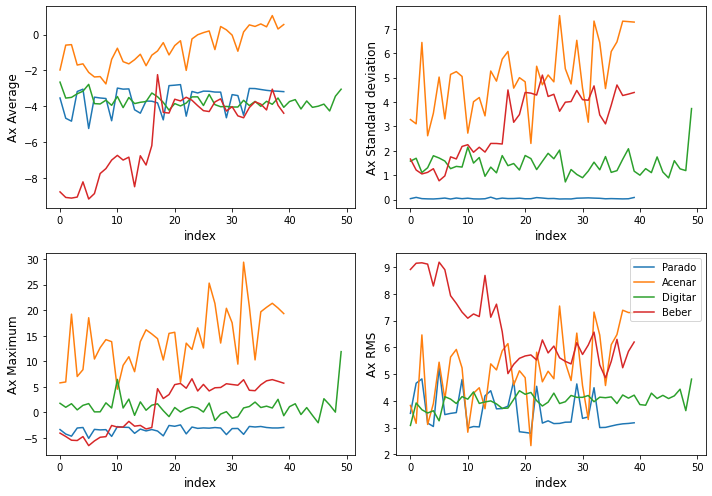

In [37]:
plot_line_data(df_train,"Ax")
plt.tight_layout()
plt.legend()

### Features de Ax no set de teste (Average, Std Deviation, Max e RMS)

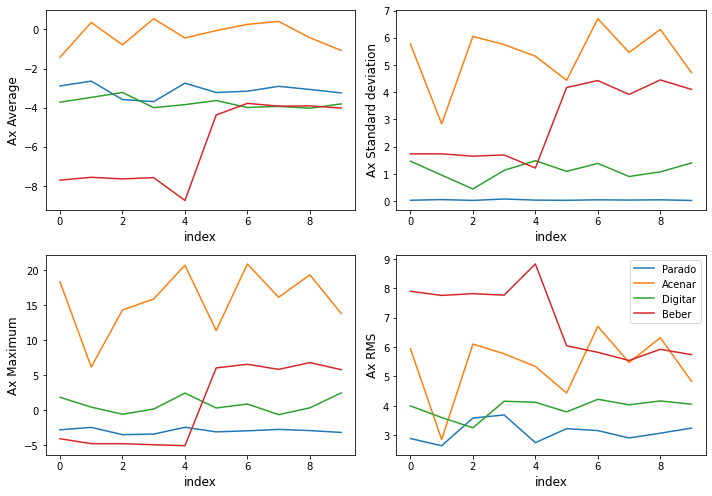

In [38]:
plot_line_data(df_test,"Ax")
plt.tight_layout()
plt.legend()

### Features de Ay no set de treinamento (Average, Std Deviation, Max e RMS)

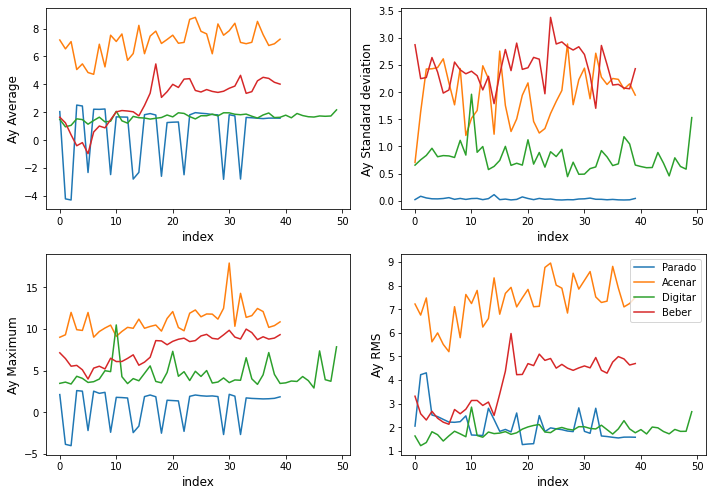

In [39]:
plot_line_data(df_train,"Ay")
plt.tight_layout()
plt.legend()

### Features de Ay no set de teste (Average, Std Deviation, Max e RMS)

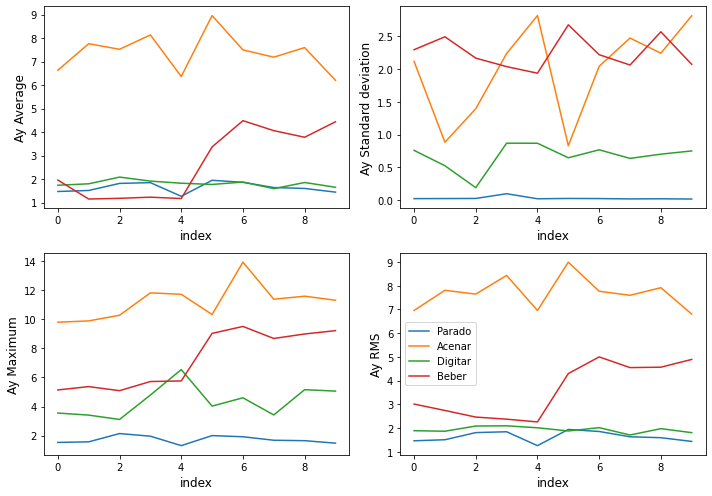

In [40]:
plot_line_data(df_test,"Ay")
plt.tight_layout()
plt.legend()

### Features de Az no set de treinamento (Average, Std Deviation, Max e RMS)

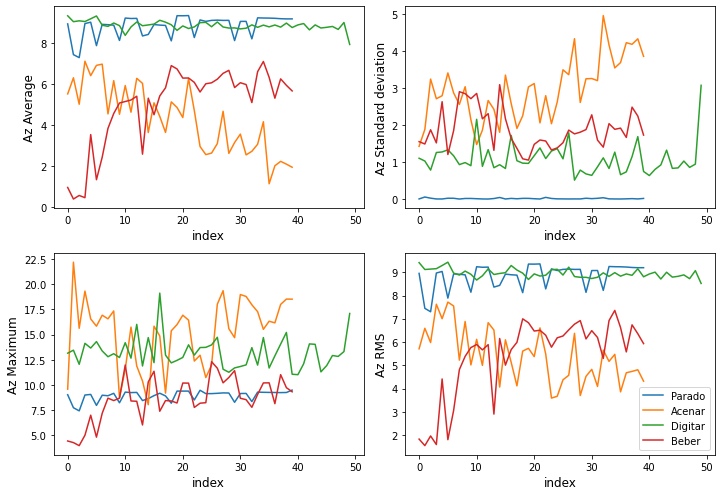

In [41]:
plot_line_data(df_train,"Az")
plt.tight_layout()
plt.legend()

### Features de Az no set de teste (Average, Std Deviation, Max e RMS)

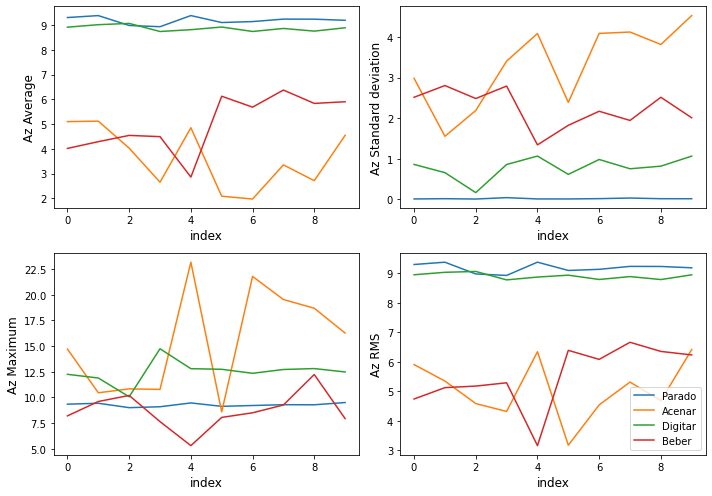

In [42]:
plot_line_data(df_test,"Az")
plt.tight_layout()
plt.legend()

### 4) Resetar os indices dos datasets

In [43]:
df_train.reset_index(inplace=True,drop=True)
df_test.reset_index(inplace=True,drop=True)

### 5) Agora temos que codificar as classes. Vamos associar um número a cada uma das classes utilizando LabelEncoder

In [44]:
from sklearn import preprocessing

In [45]:
le = preprocessing.LabelEncoder()

In [46]:
le.fit(df_train['Class'])

LabelEncoder()

In [47]:
le.classes_

array(['Acenar', 'Beber', 'Digitar', 'Parado'], dtype=object)

In [48]:
arr_classes = le.transform(df_train['Class'])

In [49]:
arr_classes

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
df_train['Class'] = pd.Series(arr_classes)

In [52]:
df_train.head(70)

,Ax_avg,Ay_avg,Az_avg,Ax_std,Ay_std,Az_std,Ax_max,Ay_max,Az_max,Ax_rms,Ay_rms,Az_rms,Class
0,-3.531306,2.043020,8.953490,0.035398,0.019925,0.013548,-3.37,2.11,9.04,3.531484,2.043118,8.953500,3
1,-4.657551,-4.219755,7.448612,0.087615,0.081493,0.065229,-4.25,-3.87,7.75,4.658375,4.220542,7.448898,3
2,-4.819816,-4.299490,7.302347,0.035694,0.050705,0.033649,-4.67,-4.03,7.44,4.819948,4.299789,7.302424,3
3,-3.169531,2.512184,8.968776,0.026108,0.034834,0.012670,-3.07,2.59,9.01,3.169638,2.512425,8.968784,3
4,-3.040184,2.444959,9.036469,0.022098,0.033174,0.012205,-2.97,2.52,9.07,3.040264,2.445184,9.036478,3
5,-5.227673,-2.327959,7.889143,0.037026,0.040121,0.032389,-5.10,-2.21,7.98,5.227805,2.328305,7.889209,3
6,-3.484122,2.213816,8.930061,0.059365,0.056141,0.031027,-3.34,2.52,8.99,3.484628,2.214528,8.930115,3
7,-3.530388,2.204388,8.915184,0.019879,0.025009,0.010864,-3.44,2.26,8.94,3.530444,2.204530,8.915190,3
8,-3.559776,2.230776,8.891041,0.060829,0.041608,0.025737,-3.39,2.38,9.18,3.560295,2.231164,8.891078,3
9,-4.797082,-2.477388,8.142714,0.033852,0.023649,0.026151,-4.71,-2.42,8.24,4.797201,2.477501,8.142756,3


In [53]:
arr_classes = le.transform(df_test['Class'])
df_test['Class'] = pd.Series(arr_classes)

In [55]:
df_test.head(20)

,Ax_avg,Ay_avg,Az_avg,Ax_std,Ay_std,Az_std,Ax_max,Ay_max,Az_max,Ax_rms,Ay_rms,Az_rms,Class
0,-2.888592,1.468306,9.300592,0.029580,0.020208,0.012708,-2.81,1.53,9.34,2.888743,1.468445,9.300601,3
1,-2.643837,1.512082,9.378592,0.054518,0.021202,0.019332,-2.46,1.57,9.43,2.644399,1.512230,9.378612,3
2,-3.585612,1.812837,8.980531,0.024280,0.022811,0.011053,-3.50,2.14,9.00,3.585694,1.812980,8.980537,3
3,-3.690347,1.846204,8.930286,0.075393,0.095037,0.045188,-3.42,1.96,9.09,3.691117,1.848649,8.930400,3
4,-2.746939,1.264122,9.379633,0.034864,0.017961,0.013057,-2.45,1.31,9.46,2.747160,1.264250,9.379642,3
5,-3.224959,1.945776,9.098592,0.027938,0.022730,0.012708,-3.10,2.00,9.13,3.225080,1.945908,9.098601,3
6,-3.158959,1.859857,9.137286,0.045472,0.020844,0.020369,-2.95,1.92,9.21,3.159286,1.859974,9.137308,3
7,-2.907694,1.636878,9.236857,0.036334,0.016043,0.035707,-2.75,1.68,9.29,2.907921,1.636956,9.236926,3
8,-3.069633,1.598286,9.234061,0.045525,0.017749,0.018726,-2.92,1.65,9.28,3.069970,1.598384,9.234080,3
9,-3.243816,1.441286,9.189041,0.022423,0.014076,0.018297,-3.18,1.48,9.50,3.243894,1.441354,9.189059,3


### 6) Vamos iniciar a construção da rede neural utilizando Keras, importando a biblioteca e alguns objetos

In [59]:
import keras

In [60]:
from keras.models import Sequential
from keras.layers import Dense

In [62]:
from keras.wrappers.scikit_learn import KerasClassifier

### 7) Embaralhando os dados e depois separando em features e labels

In [64]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [65]:
X_train = df_train.iloc[:,:12].values
y_train = df_train.loc[:,'Class'].values
X_test = df_test.iloc[:,:12].values
y_test = df_test.loc[:,'Class'].values

### 8) Vamos criar uma função que irá inicializar o objeto Sequential, que cria uma rede neural que utiliza o método de forwarding, e recebe como parâmetro o número de neurônios da camada intermediária (hidden layer)

In [70]:
df_train.shape[1]

13

In [122]:
from keras.optimizers import Adam

In [123]:
def create_model(n_neurons=5):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=X_train.shape[1], activation='relu')) # hidden layer
    model.add(Dense(4, activation='softmax')) # output layer, with 4 possible classes
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])
    return model

### 9) Através de GridSearch, iremos selecionar o melhor número de neurônios para a hidden layer

In [124]:
from sklearn.model_selection import GridSearchCV

In [76]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=1, initial_epoch=0, verbose=0)
# define the grid search parameters (number of neurons of hidden layer)
neurons=[3, 5, 10]

param_grid = dict(n_neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\menin\AppData\Local\Temp/ipykernel_17964/1391540043.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=1, initial_epoch=0, verbose=0)


Best: 0.994118 using {'n_neurons': 5}


### 10) Selecionando um conjunto menor de features

In [125]:
X_train = df_train.iloc[:,:6].values
y_train = df_train.loc[:,'Class'].values
X_test = df_test.iloc[:,:6].values
y_test = df_test.loc[:,'Class'].values

In [126]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, initial_epoch=0, verbose=0)
# define the grid search parameters (number of neurons of hidden layer)
neurons=[3, 5, 10]

param_grid = dict(n_neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\menin\AppData\Local\Temp/ipykernel_17964/523475889.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, initial_epoch=0, verbose=0)


Best: 0.988235 using {'n_neurons': 10}


### Apesar de ser um score menor, normalmente scores muito altos significam overfitting, então utilizaremos a segunda opção de conjunto de features (Average e Std deviation)

### 11) Treinando o modelo agora com o número de neurônios escolhido

In [127]:
model.fit(X_train,y_train)

### 12) Analisando as métricas de classificação

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
y_pred = model.predict(X_train)

6/6 [==============================] - 0s 997us/step


In [130]:
print("Accuracy on training set:" + str(accuracy_score(y_train, y_pred) * 100))

Accuracy on training set:72.94117647058823


In [131]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 998us/step


In [132]:
print("Accuracy on testing set:" + str(accuracy_score(y_test, y_pred) * 100))

Accuracy on testing set:67.5


In [133]:
from sklearn.metrics import f1_score

In [134]:
y_pred = model.predict(X_train)

6/6 [==============================] - 0s 997us/step


In [135]:
print("f1 score on training set:" + str(f1_score(y_train, y_pred,average='macro') * 100))

f1 score on training set:64.23288119157957


In [136]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [137]:
print("f1 score on testing set:" + str(f1_score(y_test, y_pred,average='macro') * 100))

f1 score on testing set:59.982174688057036


In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
confmat = confusion_matrix(y_test,y_pred)

In [140]:
def plot_conf_matrix(confmat):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()

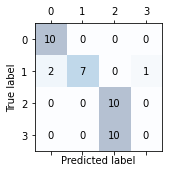

In [142]:
plot_conf_matrix(confmat)